In [1]:
# #This code attempts to answer the following questions
#Question 1: Totals
#1a) How many cases and deaths have been reported in total since January?
#1b) How has the rate of change developed over time?
#1c) What observations can we make from this high-level analysis?

#Question 2: Saturation
#2a) How many counties reported cases and deaths each day?
#2b) ###Map of infected counties ###
#2c) What observations can be made from this analysis?

#Question 3: Effect on different States
#3a) What is the relationship between State population and Total Deaths?
#3b) Which states have the highest deaths/cases ratio?
#3c) Are any of these outliers (box/whisker)?
#3d) What is the distribution of Deaths/Case Rate?
#3e) Do the states with the highest death/case rate also have the highest deaths per capita? (A high death/case ratio could lead to fewer deaths per capita if cases die before they infect others)
#3f) Interesting observations from this analysis?

#Question 4: Concentration
#4a) Which States/Counties have been most affected?
#4b) Where are they?
#4c) Is there a correlation between Total Deaths and Lat?
#4d) Is there a correlation between Total Deaths and Lng?
#4e) Interesting observations from this analysis?

In [2]:
# Dependencies and Setup
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from scipy import stats
import requests
import gmaps
from api_keys import g_key

# Set global plot size
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [3]:
#import csv files from output_data path
file_path = os.path.join('output_data', 'cases_by_county_df.csv')
cases_by_county_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'cases_by_state_df.csv')
cases_by_state_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'deaths_by_county_df.csv')
deaths_by_county_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'deaths_by_state_df.csv')
deaths_by_state_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'rates_by_county_df.csv')
rates_by_county_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'rates_by_state_df.csv')
rates_by_state_df = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'cases_by_county_per_capita.csv')
cases_by_county_per_capita = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'deaths_by_county_per_capita.csv')
deaths_by_county_per_capita = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'rates_by_county_per_capita.csv')
rates_by_county_per_capita = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'cases_by_state_per_capita.csv')
cases_by_state_per_capita = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'deaths_by_state_per_capita.csv')
deaths_by_state_per_capita = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('output_data', 'rates_by_state_per_capita.csv')
rates_by_state_per_capita = pd.read_csv(file_path, encoding="utf-8")

file_path = os.path.join('source_data', 'US_States_Lat_Lng.csv')
US_States_Lat_Lng = pd.read_csv(file_path, encoding="utf-8")


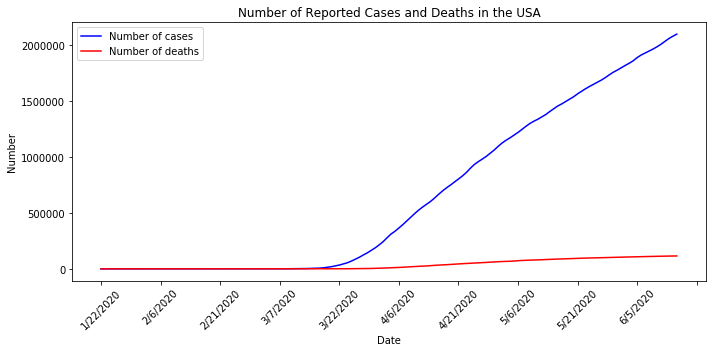

In [4]:
#Question 1: Totals
#1a) How many cases and deaths have been reported in total since January?
list_of_dates = [column for column in deaths_by_state_df.columns if column not in ['countyFIPS', 'stateFIPS','State','population']]
total_cases_list = cases_by_state_df.loc[:,'1/22/2020':'6/15/2020'].sum()
total_deaths_list = deaths_by_state_df.loc[:,'1/22/2020':'6/15/2020'].sum()
x_axis = list_of_dates
#Plot Graph
plt.plot(x_axis, total_cases_list, color='blue', label="Number of cases")
plt.plot(x_axis, total_deaths_list, color='red', label="Number of deaths")
plt.figsize = (30,20)
plt.title("Number of Reported Cases and Deaths in the USA")
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15))
plt.tight_layout()
plt.savefig('output_data/Graph_Reported_Cases_and_Deaths.png')
plt.show()

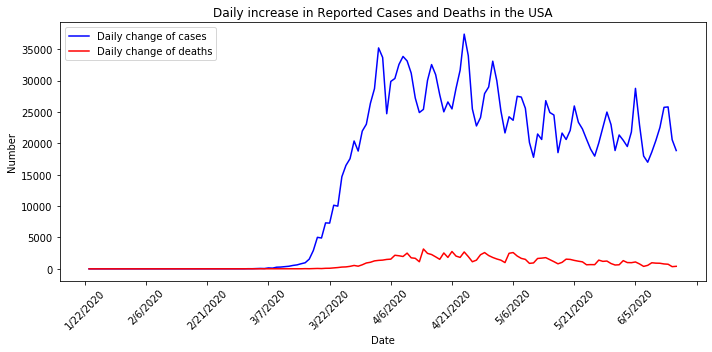

In [5]:
#1b) How has the rate of change developed over time?
rate_of_change_df = pd.DataFrame()
rate_of_change_df['Total Cases'] = total_cases_list
rate_of_change_df['Change in Total Cases'] = rate_of_change_df['Total Cases'].diff()
rate_of_change_df['Total Deaths'] = total_deaths_list
rate_of_change_df['Change in Total Deaths'] = rate_of_change_df['Total Deaths'].diff()
#Plot Graph
plt.plot(x_axis, rate_of_change_df['Change in Total Cases'], color='blue', label="Daily change of cases")
plt.plot(x_axis, rate_of_change_df['Change in Total Deaths'], color='red', label="Daily change of deaths")
plt.title("Daily increase in Reported Cases and Deaths in the USA")
plt.xlabel('Date')
plt.ylabel('Number')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15))
plt.tight_layout()
plt.savefig('output_data/Graph_Change_in_Reported_Cases_and_Deaths.png')
plt.show()

In [6]:
#1c) What observations can we make from this high-level analysis?
#Analyse graph 1a)
x = total_cases_list[-1]
y = total_deaths_list[-1]
print('The graph shows a dramatic rise in cases from mid March, then a slower rise in reported deaths.')
print(f'On 15 June 2020, there were {x} total reported cases, and {y} reported deaths.')
#Analyse graph 1b)
x = total_cases_list[-1]
y = total_deaths_list[-1]
print('From late March, the daily increase of reported deaths and cases slowed.')
print('The data shows a weekly seasonality, hinting at possible reporting bias in the data.')

The graph shows a dramatic rise in cases from mid March, then a slower rise in reported deaths.
On 15 June 2020, there were 2101560 total reported cases, and 115386 reported deaths.
From late March, the daily increase of reported deaths and cases slowed.
The data shows a weekly seasonality, hinting at possible reporting bias in the data.


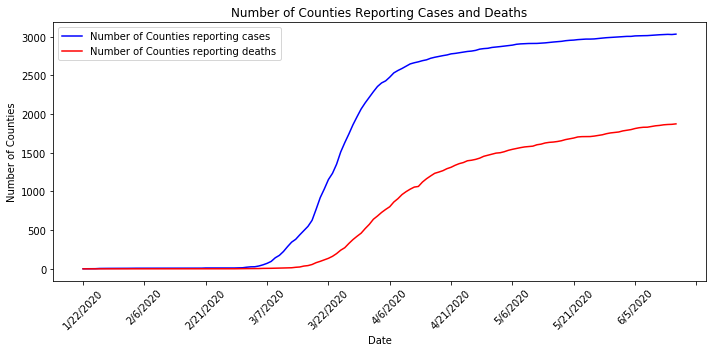

In [7]:
#Question 2: Saturation
#2a) How many counties reported cases and deaths each day?
number_of_counties_with_cases = cases_by_county_df.loc[:,'1/22/2020':'6/15/2020'].astype(bool).sum(axis=0)
number_of_counties_with_deaths = deaths_by_county_df.loc[:,'1/22/2020':'6/15/2020'].astype(bool).sum(axis=0)
#Plot Graph
plt.plot(x_axis, number_of_counties_with_cases, color='blue', label="Number of Counties reporting cases")
plt.plot(x_axis, number_of_counties_with_deaths, color='red', label="Number of Counties reporting deaths")
plt.figsize = (30,20)
plt.title("Number of Counties Reporting Cases and Deaths")
plt.xlabel('Date')
plt.ylabel('Number of Counties')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(15))
plt.tight_layout()
plt.savefig('output_data/Graph_Counties_Reporting_Cases_and_Deaths.png')
plt.show()

In [8]:
#2b) ###Map of infected counties ###


In [9]:
#2c) What observations can be made from this analysis?
#Analyse graph 2a
x = cases_by_county_df['6/15/2020'].count()
y = x - number_of_counties_with_cases[-1]
z = number_of_counties_with_cases[-1] - number_of_counties_with_deaths[-1]
print('The number of counties reporting cases started rising in late February.')
print('There was a clear acceleration in early March, with the S-curve bending in early April.') 
print('The number of counties reporting deaths started rising ~10-14 days later.')
print('Interestingly, even by mid-June, there were still multiple counties showing no deaths or even cases.')
print(f'There are {x} counties in the US.')
print(f'On 15 June 2020, there were still {y} counties reporting zero cases. {z/x}% of counties reported some cases but zero deaths.')

The number of counties reporting cases started rising in late February.
There was a clear acceleration in early March, with the S-curve bending in early April.
The number of counties reporting deaths started rising ~10-14 days later.
Interestingly, even by mid-June, there were still multiple counties showing no deaths or even cases.
There are 3195 counties in the US.
On 15 June 2020, there were still 161 counties reporting zero cases. 0.36306729264475746% of counties reported some cases but zero deaths.


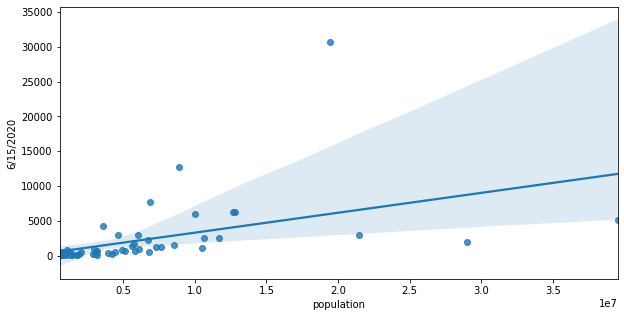

In [10]:
#Question 3: Effect on different States
#3a) What is the relationship between State population and Total Deaths?
sns.regplot(x="population", y="6/15/2020", data=deaths_by_state_df);
plt.savefig('output_data/Graph_State_Population_and_Deaths.png')

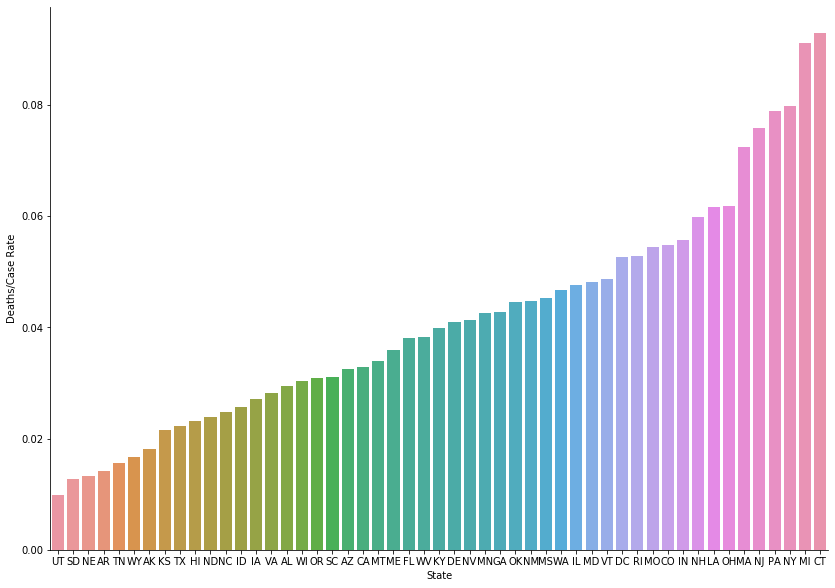

In [11]:
#3b) Which states have the highest deaths/cases ratio?
df = pd.DataFrame()
df['State'] = rates_by_state_df['State']
df['Deaths/Case Rate'] = rates_by_state_df['6/15/2020']
df.sort_values(by=['Deaths/Case Rate'], inplace=True)
sns.catplot(x='State', y='Deaths/Case Rate',kind="bar", data=df,height=8.27, aspect=11.7/8.27);
plt.savefig('output_data/Graph_State_and_Death_Rate.png')

In [12]:
#Make a list of most affected states, for use later.
most_affected_states = []
most_affected_states.append(df['State'].tail(6))

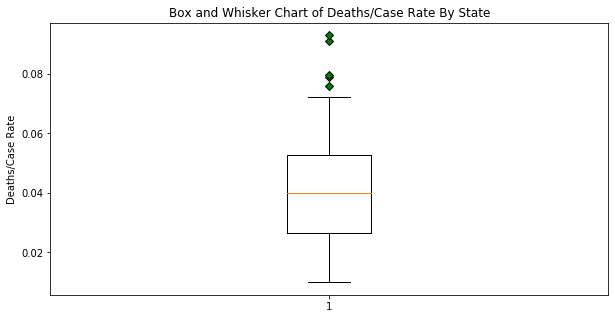

In [13]:
#3c) Are any of these outliers (box/whisker)?
fig, ax = plt.subplots()
ax.set_title('Box and Whisker Chart of Deaths/Case Rate By State')
ax.set_ylabel('Deaths/Case Rate')
ax.boxplot(df['Deaths/Case Rate'],flierprops=dict(markerfacecolor='g', marker='D'), vert=True, whis=0.75)
plt.savefig('output_data/Graph_BoxAndWhisker_State_Death_Rate.png')
plt.show()

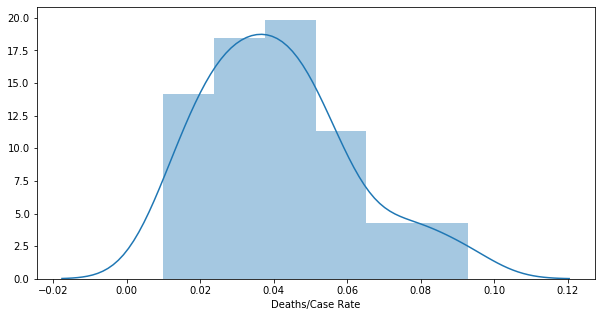

In [14]:
#3d) What is the distribution of Deaths/Case Rate?
sns.distplot(df['Deaths/Case Rate'])
plt.savefig('output_data/Graph_Distribution_State_Death_Rate.png')

The r-squared is: 0.6471146864314816


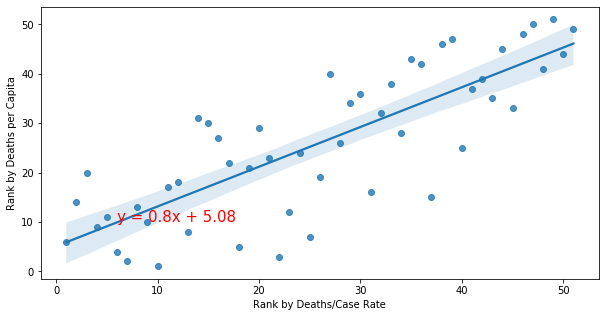

In [15]:
#3e) Do the states with the highest death/case rate also have the highest deaths per capita? (A high death/case ratio could lead to fewer deaths per capita if cases die before they infect others)
summary_df = pd.DataFrame()
summary_df['State'] = rates_by_state_df['State']
summary_df['Deaths/Case Rate'] = rates_by_state_df['6/15/2020']
summary_df['Deaths per Capita'] = deaths_by_state_per_capita['6/15/2020']
summary_df['Rank by Deaths/Case Rate'] = summary_df['Deaths/Case Rate'].rank()
summary_df['Rank by Deaths per Capita'] = summary_df['Deaths per Capita'].rank()
slope, intercept, r_value, p_value, std_err = stats.linregress(summary_df['Rank by Deaths/Case Rate'],summary_df['Rank by Deaths per Capita'])
ax = sns.regplot(x='Rank by Deaths/Case Rate', y='Rank by Deaths per Capita', data=summary_df);
print(f"The r-squared is: {r_value**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.savefig('output_data/Graph_Rank_State_Death_Rate.png')
plt.show()

In [16]:
#3f) Interesting observations from this analysis?
#Analyse graph 3a
print("The relationship between State Population and Total Deaths is not as strong as you might think. This implies a significant difference in death rates by state.")
#Analyse graph 3b
print('The bar chart show NJ, PA, NY, MI and CT having the highest ratio of deaths to cases.')
#Analyse graph 3c
print('The box-and-whisker chart shows these states are outside the IQR of all the states.')
print('This suggests these states are statisically signficantly different.')
#Analyse graph 3d
print('There is a noticable right skew to the distribution.')
#Analyse graph 3e
print(f'The r-squared of {r_value**2} is decent but not high.')
print('There is a positive correlation between Rank of State by death rate and deaths per capita.')
print('This implies there is something else going on as well.')

The relationship between State Population and Total Deaths is not as strong as you might think. This implies a significant difference in death rates by state.
The bar chart show NJ, PA, NY, MI and CT having the highest ratio of deaths to cases.
The box-and-whisker chart shows these states are outside the IQR of all the states.
This suggests these states are statisically signficantly different.
There is a noticable right skew to the distribution.
The r-squared of 0.6471146864314816 is decent but not high.
There is a positive correlation between Rank of State by death rate and deaths per capita.
This implies there is something else going on as well.


In [17]:
#Question 4: Concentration
#4a) Which States/Counties have been most affected?
summary_df['Total Deaths']  = deaths_by_state_df['6/15/2020']
most_deaths = summary_df.nlargest(6,'Total Deaths')['State']
print(f'The states with the most deaths are {most_deaths.iloc[0]}, {most_deaths.iloc[1]}, {most_deaths.iloc[2]}, {most_deaths.iloc[3]}, {most_deaths.iloc[4]}, and {most_deaths.iloc[5]}.')
highest_deaths_capita = summary_df.nlargest(6,'Deaths per Capita')['State']
print(f'The states with the most deaths per capita are {highest_deaths_capita.iloc[0]}, {highest_deaths_capita.iloc[1]}, {highest_deaths_capita.iloc[2]}, {highest_deaths_capita.iloc[3]}, {highest_deaths_capita.iloc[4]}, and {highest_deaths_capita.iloc[5]}.')

The states with the most deaths are NY, NJ, MA, IL, PA, and MI.
The states with the most deaths per capita are NY, NJ, CT, MA, RI, and DC.


In [18]:
#4b) Where are they?
#import lat/lng data and merge
summary_df = pd.merge(summary_df, US_States_Lat_Lng, on="State", how="inner")
most_deaths = pd.DataFrame(most_deaths)
most_deaths['Lat'] = summary_df['Latitude']
most_deaths['Lng'] = summary_df['Longitude']
#gmaps
gmaps.configure(api_key=g_key)
info_box_template = """
<dl>
<dt>Name</dt><dd>{State}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
most_deaths_info = [info_box_template.format(**row) for index, row in most_deaths.iterrows()]
locations = most_deaths[["Lat", "Lng"]]
# Customize the size of the figure
figure_layout = {
    'width': '960px',
    'height': '500px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}
# Add the layer to the map
most_deaths = [info_box_template.format(**row) for index, row in most_deaths.iterrows()]
marker_layer = gmaps.marker_layer(locations, info_box_content=most_deaths_info)
fig = gmaps.figure(layout=figure_layout,center=(42.0, -75.0), zoom_level=3)
fig.add_layer(marker_layer)
#Print a new map
plt.savefig('')
fig

Figure(layout=FigureLayout(border='1px solid black', height='500px', margin='0 auto 0 auto', padding='1px', wi…

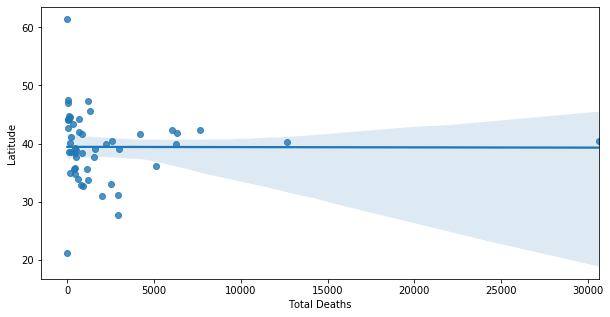

In [19]:
#4c) Is there a correlation between Total Deaths and Lat?
sns.regplot(x="Total Deaths", y="Latitude", data=summary_df);
plt.savefig('output_data/Graph_State__Deaths_Lat.png')

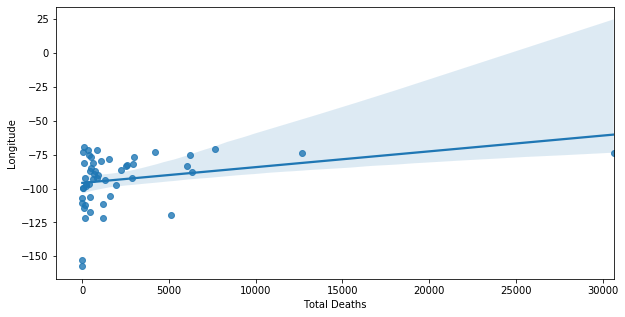

In [20]:
#4d) Is there a correlation between Total Deaths and Lng?
sns.regplot(x="Total Deaths", y="Longitude", data=summary_df);
plt.savefig('output_data/Graph_State__Deaths_Lng.png')

In [21]:
#4e) Interesting observations from this analysis?
print('The most affected states are primarily in the NE of the US.')

The most affected states are primarily in the NE of the US.
